In [2]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pylab as plt

import time


# 준비된 데이터들을 확인할 것 : 2가지 파일 [ train.csv, test.csv]
* 참고 : 해당 데이터는 kaggle 부분에서 참고한 것임.

* numpy.genfromtxt : Load data from a text file, with missing values handled as specified.
numpy.genfromtxt(fname, dtype=<type 'float'>, comments='#', delimiter=None, skip_header=0, skip_footer=0, converters=None, missing_values=None, filling_values=None, usecols=None, names=None, excludelist=None, deletechars=None, replace_space='_', autostrip=False, case_sensitive=True, defaultfmt='f%i', unpack=None, usemask=False, loose=True, invalid_raise=True, max_rows=None)[source]
* ref) https://docs.scipy.org/doc/numpy/reference/generated/numpy.genfromtxt.html

* train.csv 파일을 직접 열어서 확인할 것!! 그 이후에 이 파일을 어떻게 불러들여야 하는지 옵션을 선택할 수 있음!
* 참고) uint8의 형식으로 받기

In [3]:
t1 = time.time()
mnist_train_data_path = "train.csv"

train = np.genfromtxt(mnist_train_data_path, delimiter=',', skip_header=1).astype(np.dtype('uint8'))
t2 = time.time()

print ("Process Time : " + str(t2-t1))
print (train)

Process Time : 20.063809871673584
[[1 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 ...
 [7 0 0 ... 0 0 0]
 [6 0 0 ... 0 0 0]
 [9 0 0 ... 0 0 0]]


In [4]:
t1 = time.time()
mnist_test_data_path = "test.csv"

test = np.genfromtxt(mnist_test_data_path, delimiter=',', skip_header=1).astype(np.dtype('uint8'))
t2 = time.time()

print ("Process Time : " + str(t2-t1))
print (test)

Process Time : 12.263181209564209
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [5]:
print (len(train))
print (len(test))

42000
28000


* 참고) 위의 방법은 처음에 로드할 경우에 많은 시간이 소요된다.
* 이를 해결하기 위해서는 처음에 큰 파일을 로드하고 나서, pickle을 이용해서 변환을 하면 다음에는 읽는데 시간이 적게 소요됨.
* ref ) 
import pickle
with open('data/train_points.p', 'wb') as f:
    pickle.dump(X, f)
...
with open('data/train_points.p', 'rb') as f:
    X = pickle.load(f)

# 데이터 분리
* 받은 데이터가 실제 데이터가 의미하는 숫자(0~9) + 실제 데이터로 구성되어 있음.
* 즉, 1개의 데이터의 값이 일렬로 시리얼로 들어가 있는데, 맨 앞의 값이 label이고, 그 뒤의 값이 실제 데이터에 관련된 것임
* 이를 통해서 라벨 + 데이터로 구분

In [6]:
train_data = train[:,1:]
train_labels = train[:,0]

In [7]:
print(train_data)
print(train_labels)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[1 0 1 ... 7 6 9]


In [7]:
# 참고로 Kaggle Data의 경우에는 label을 사이트에 올려야 정확도를 확인하게 되어 있어서 train하고 달리 순수한 data만 있음.

# 0~9까지 데이터가 다 들어있는지 확인!
* 실제로 우리가 학습 시킬 데이터가 0~9까지 다 제대로 들어있는 데이터인지 확인

In [14]:
np.unique(train_labels,return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([4132, 4684, 4177, 4351, 4072, 3795, 4137, 4401, 4063, 4188],
       dtype=int64))

# 학습 시키려는 데이터의 분포가 균일하게 적당히 분포가 되었는지 확인!!!!
[   0 4132]
 [   1 4684]
 [   2 4177]
 [   3 4351]
 [   4 4072]
 [   5 3795]
 [   6 4137]
 [   7 4401]
 [   8 4063]
 [   9 4188]
 * 위와 같은 결과가 나오는지 확인!!!(단, 방법은 여러가지임!)

In [16]:
# Method _ 01) numpy의 unique이용해서 처리
cat, counts = np.unique(train_labels,return_counts=True)
print(np.asarray((cat,counts)).T)

[[   0 4132]
 [   1 4684]
 [   2 4177]
 [   3 4351]
 [   4 4072]
 [   5 3795]
 [   6 4137]
 [   7 4401]
 [   8 4063]
 [   9 4188]]


# 실제 데이터 값을 이미지로 확인해보자!
* ref) http://yann.lecun.com/exdb/mnist/
* 위의 사이트에 들어가서 실제 데이터의 구성을 확인해보자!!! 실제 내용을 보면 원래 데이터는 28 X 28 크기의 이미지로 이루어진 것을 알 수 있다. 다만, 우리가 받아들이고, 데이터화 하는 과정에서 label이 부여되었고, 처리를 위해서 matrix가 아닌 28x28 크기의 1차원 어레이로 처리가 된 것을 볼 수 있다.

* 시각화 부분 : http://seaborn.pydata.org/generated/seaborn.heatmap.html

In [21]:
import seaborn as sns

In [22]:
# 이미 앞에서 label은 분리하였으니, 순수 데이터에서 크기 부분을 확인하자!!!
print(train_data[0].shape)
print(int(np.sqrt(train_data[0].shape)))

(784,)
28


Text(0.5, 1, 'MNIST Digit Image _ Train Data Number : 0')

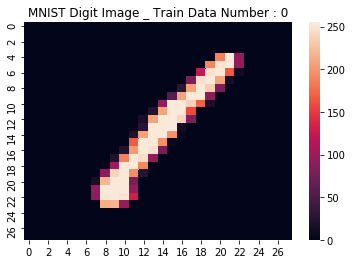

In [28]:

# 보고자 하는 데이터의 index
idx = 0

# 앞에 한 것을 참고로 데이터를 시각화 해보세요~
image_data = train_data[idx]

# 1차원이기 때문에 실제 값을 계산하기 위해서는 1차원의 길이값 획득 & 이를 제곱근으로 변환!!
tot_size = image_data.shape[0]
one_size = int(np.sqrt(tot_size))

# 그림으로 표현
sns.heatmap(np.reshape(image_data, (one_size, one_size)))
plt.title(str("MNIST Digit Image _ Train Data Number : ")+str(idx))

Text(0.5, 1, 'MNIST Digit Image _ Train Data Number : 0')

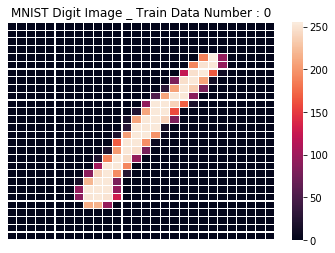

In [29]:
sns.heatmap(np.reshape(image_data, (one_size, one_size)),
            linewidth=0.1,             # linewidth ; 줄 간격 설정
            xticklabels=False,        # xticklabels : 라벨의 값 표시 설정
            yticklabels=False)
plt.title(str("MNIST Digit Image _ Train Data Number : ")+str(idx))

Text(0.5, 1, 'MNIST Digit Image _ Train Data Number : 0')

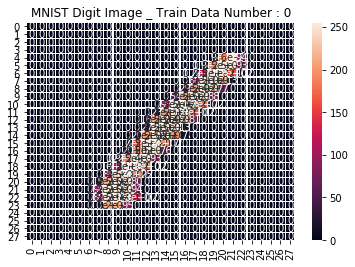

In [30]:
# 데이터의 실제 값을 보고 싶을 때!!!
sns.heatmap(np.reshape(image_data, (one_size, one_size)),
            linewidth=0.1,
            xticklabels=True,
            yticklabels=True,
            annot=True)            # annot : 실제 값 찍기
plt.title(str("MNIST Digit Image _ Train Data Number : ")+str(idx))

Text(0.5, 1, 'MNIST Digit Image _ Train Data Number : 0')

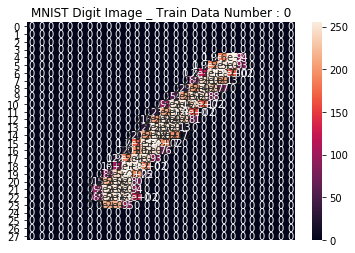

In [31]:
# 참고) xticklabels, yticklabels 중에서 하나라도 F 이면 annot 기능이 활성화 되지 않는다;;;
sns.heatmap(np.reshape(image_data, (one_size, one_size)),
            xticklabels=False,
            yticklabels=True,
            annot=True)
plt.title(str("MNIST Digit Image _ Train Data Number : ")+str(idx))

In [23]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

In [24]:
# 주의!!) 생각보다 데이터의 양이 많기 때문에 시간이 오래걸릴 수 있음!!!
t1= time.time()

# Default k=5
knn = KNeighborsClassifier(n_neighbors=5,n_jobs=-1)

# Data Fitting
knn.fit(train_data,train_labels)

# Data Prediction
pred = knn.predict(test)
t2 = time.time()
print("Process Time : " + str(t2-t1))

Process Time : 225.15906715393066


In [25]:
# 실제로 결과가 나타났는지 확인
print(len(pred))
print(pred)

28000
[2 0 9 ... 3 9 2]


* Kaggle 에서는 그냥 업로드를 하는 것이 아니라 특정한 가이드가 있음. 이는 변경될 수 있으니, 해당 정보들을 확인하고 할 것!!
* 여기서는 csv 양식으로 업로드를 해야하고, 컬럼 이름이 ImageId, Label 이고, test 데이터의 값들과 그 옆에 모델을 통해 예측한 값을 기록하여 업로드를 해야함.

In [27]:
# 출력용 만들기
img_id=[]

for i in range(1, len(test)+1):
    img_id.append(i)     # [1, 2, 3, ... , 42000]
predMNIST = pd.DataFrame({"ImageId":img_id,"Label":pred})

out_path="mnist_pred.csv"
predMNIST.to_csv(out_path, index=False)     # 가로줄의 인덱스가 무조건 생성되기 때문에 index=False 가 필요하다

# 실제로 Kaggle에 Summit 하기!!!
* ref) https://www.kaggle.com/c/digit-recognizer/leaderboard

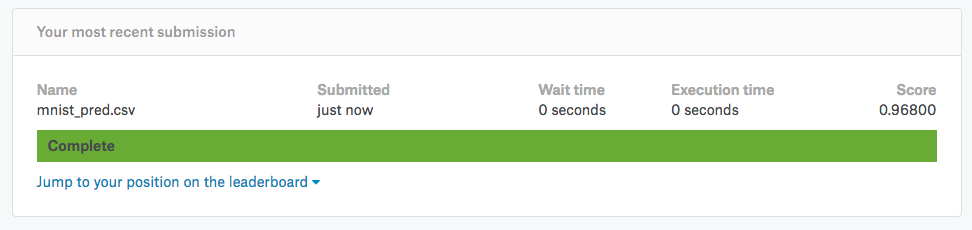

In [42]:
img_path = u"/Users/minkyukwon/PycharmProjects/MachineLearning_Course/10_knn/ref_img/kaggle_test_submit.png"
from IPython.display import Image
Image(filename=img_path) 

# 위의 데이터를 PCA를 적용해서 해보자!!!

In [51]:
# 단순히 앞의 코드를 재사용하기 위해서 변수명 변경
test_data = test

In [52]:
from sklearn.decomposition import PCA

In [53]:
num_comp = 40
pca = PCA(n_components=num_comp)

In [54]:
pca.fit(train_data)

PCA(copy=True, iterated_power='auto', n_components=40, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [55]:
# determine amount of variance explained by components
np.sum(pca.explained_variance_ratio_)

0.7870496131755186

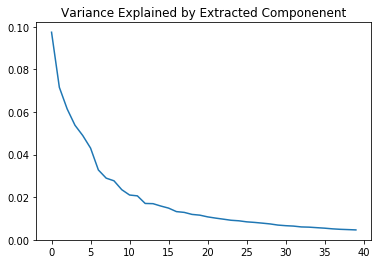

In [56]:
# plot the explained variance
plt.plot(pca.explained_variance_ratio_)
plt.title('Variance Explained by Extracted Componenent')
plt.show()

In [57]:
# extract the features
train_ext = pca.fit_transform(train_data)
print(train_ext.shape)

(42000, 40)


In [58]:
# transform the test data using the existing parameters
test_ext = pca.transform(test_data)
print(test_ext.shape)

(28000, 40)


In [42]:
from sklearn.preprocessing import MinMaxScaler

In [59]:
min_max_scaler = MinMaxScaler()

In [60]:
train_norm = min_max_scaler.fit_transform(train_data)
test_norm = min_max_scaler.fit_transform(test_data)

In [62]:
# 학습시키기.
knn = KNeighborsClassifier()
knn.fit(train_norm, train_labels)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [63]:
from sklearn.model_selection import cross_val_score

In [64]:
cross_val_score(knn,train_norm,train_labels, cv=5)

array([0.96797619, 0.96559524, 0.96345238, 0.96333333, 0.96892857])

In [65]:
pred_with_pca = knn.predict(test_norm)

In [66]:
# 출력용 만들기
img_id = []
# sumit 관련해서는 id가 1부터 시작되어야 하니, index matching 부분임.
for i in range(1, len(test)+1):
    img_id.append(i)

predMNIST_withPCA = pd.DataFrame({ "ImageId": img_id,"Label": pred_with_pca})
    
# outPath
out_path = "mnist_pred2.csv"
predMNIST_withPCA.to_csv(out_path, index=False)



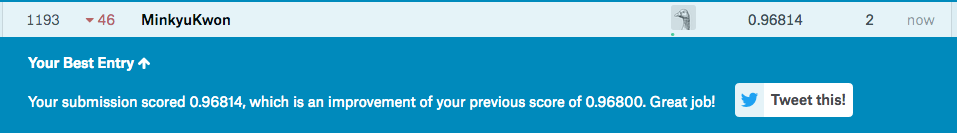

In [31]:
img_path = u"/Users/minkyukwon/PycharmProjects/MachineLearning_Course/10_knn/ref_img/kaggle_test_submit_withPCA.png"
from IPython.display import Image
Image(filename=img_path) 